<a href="https://colab.research.google.com/github/kanhaia21/Assignments/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theoretical

In [1]:
content="""
1. What is unsupervised learning in the context of machine learning?
Unsupervised learning is a type of machine learning where the model is trained on data without labels. The algorithm tries to find hidden structures, patterns, or groupings in the data (e.g., clustering, dimensionality reduction).

2. How does K-Means clustering algorithm work?
•	Choose k (number of clusters).
•	Randomly initialize k centroids.
•	Assign each point to the nearest centroid (forming clusters).
•	Update centroids as the mean of points in each cluster.
•	Repeat assignment + update until centroids stabilize (convergence).

3. Explain the concept of a dendrogram in hierarchical clustering.
A dendrogram is a tree-like diagram that shows the merging or splitting of clusters in hierarchical clustering. The vertical axis represents the distance or dissimilarity between clusters, helping to decide the number of clusters by "cutting" the tree at a certain height.

4. What is the main difference between K-Means and Hierarchical Clustering?
•	K-Means: Requires the number of clusters (k) in advance; works by iterative centroid updates.
•	Hierarchical: Doesn’t require pre-specifying k; builds a tree of clusters (bottom-up or top-down).

5. What are the advantages of DBSCAN over K-Means?
•	Can find arbitrarily shaped clusters.
•	Automatically detects the number of clusters.
•	Identifies noise/outliers.
•	Works better with clusters of varying sizes/densities.

6. When would you use Silhouette Score in clustering?
When evaluating how well-separated and well-formed clusters are. It measures cohesion (similarity within clusters) vs. separation (difference from other clusters). Range: -1 (bad) to +1 (good).

7. What are the limitations of Hierarchical Clustering?
•	Computationally expensive (O(n²)).
•	Sensitive to noise and outliers.
•	Hard to scale to large datasets.
•	Once merged/split, decisions cannot be undone.

8. Why is feature scaling important in clustering algorithms like K-Means?
Because K-Means uses Euclidean distance, features with larger scales dominate distance calculations, biasing the clustering results. Scaling (standardization/normalization) ensures fairness.

9. How does DBSCAN identify noise points?
Points that do not belong to any cluster (not enough neighbors within ε distance) are labeled as noise (outliers).

10. Define inertia in the context of K-Means.
Inertia = sum of squared distances between each point and its cluster centroid. It measures how compact clusters are (lower is better).

11. What is the elbow method in K-Means clustering?
A method to choose the optimal number of clusters (k) by plotting inertia vs. k and looking for the "elbow" point where improvement levels off.

12. Describe the concept of "density" in DBSCAN.
Density refers to the number of points within a neighborhood (ε radius). Dense regions form clusters, while sparse regions are noise.

13. Can hierarchical clustering be used on categorical data?
Yes, but not with standard distance metrics. You need specialized measures (e.g., Hamming distance, Gower distance) or categorical-specific methods.

14. What does a negative Silhouette Score indicate?
That the sample is closer to another cluster than its assigned cluster, meaning poor clustering.

15. Explain the term "linkage criteria" in hierarchical clustering.
The rule for measuring distance between clusters:
•	Single linkage: closest points.
•	Complete linkage: farthest points.
•	Average linkage: average distance.
•	Ward’s method: minimizes variance within clusters.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
Because K-Means assumes equal-sized spherical clusters and minimizes variance. It struggles when clusters differ in shape, density, or size.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
•	ε (epsilon): neighborhood radius; controls cluster size.
•	min_samples: minimum points required to form a dense region.
Together, they determine what is considered a cluster vs. noise.
18. How does K-Means++ improve upon standard K-Means initialization?
It selects initial centroids strategically (far apart) instead of randomly, leading to faster convergence and better clustering results.

19. What is agglomerative clustering?
A bottom-up hierarchical clustering method where each point starts as its own cluster and pairs of clusters merge step by step until one cluster remains.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
•	Inertia only measures compactness, not separation.
•	Silhouette Score considers both cohesion and separation, giving a more balanced measure of clustering quality.
"""
print(content)


1. What is unsupervised learning in the context of machine learning?
Unsupervised learning is a type of machine learning where the model is trained on data without labels. The algorithm tries to find hidden structures, patterns, or groupings in the data (e.g., clustering, dimensionality reduction).

2. How does K-Means clustering algorithm work?
•	Choose k (number of clusters).
•	Randomly initialize k centroids.
•	Assign each point to the nearest centroid (forming clusters).
•	Update centroids as the mean of points in each cluster.
•	Repeat assignment + update until centroids stabilize (convergence).

3. Explain the concept of a dendrogram in hierarchical clustering.
A dendrogram is a tree-like diagram that shows the merging or splitting of clusters in hierarchical clustering. The vertical axis represents the distance or dissimilarity between clusters, helping to decide the number of clusters by "cutting" the tree at a certain height.

4. What is the main difference between K-Means an

#Practical

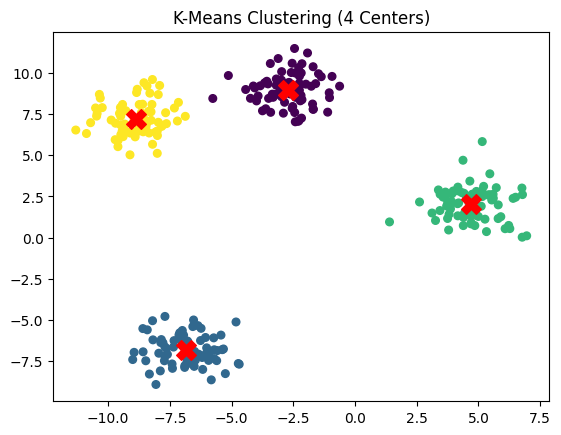

In [2]:
#21. Synthetic data (make_blobs) + K-Means clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200)
plt.title("K-Means Clustering (4 Centers)")
plt.show()


In [3]:
#22. Iris dataset + Agglomerative Clustering
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X, y = load_iris(return_X_y=True)
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print("First 10 Predicted Labels:", labels[:10])


First 10 Predicted Labels: [1 1 1 1 1 1 1 1 1 1]


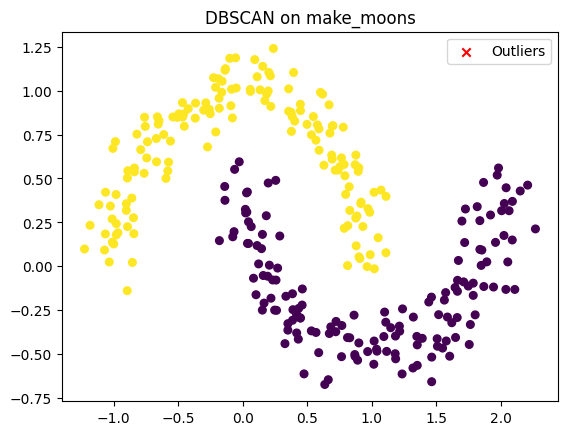

In [4]:
#23. Synthetic data (make_moons) + DBSCAN (highlight outliers)
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1], c="red", marker="x", label="Outliers")
plt.title("DBSCAN on make_moons")
plt.legend()
plt.show()


In [5]:
#24. Wine dataset + K-Means (with StandardScaler)
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

X, y = load_wine(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))


Cluster Sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


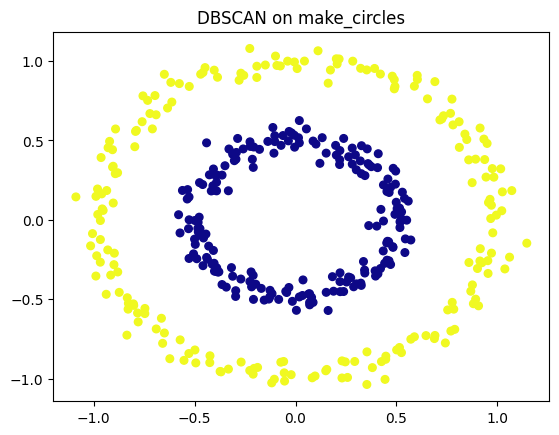

In [6]:
#25. make_circles + DBSCAN
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="plasma", s=30)
plt.title("DBSCAN on make_circles")
plt.show()


In [7]:
#26. Breast Cancer dataset + MinMaxScaler + K-Means
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

X, y = load_breast_cancer(return_X_y=True)
X_scaled = MinMaxScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

print("Cluster Centroids:\n", kmeans.cluster_centers_)


Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


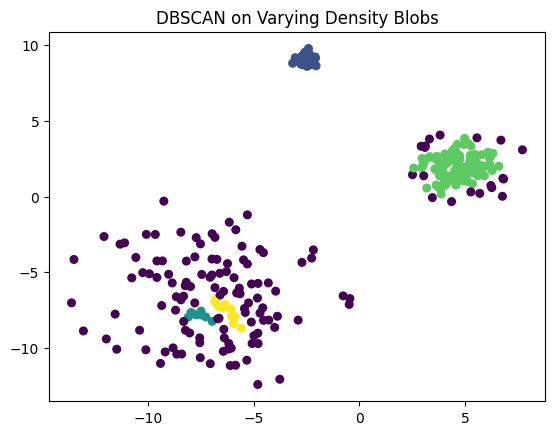

In [8]:
#27. make_blobs with varying std + DBSCAN
X, y = make_blobs(n_samples=400, centers=3, cluster_std=[0.2, 1.0, 2.5], random_state=42)
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.title("DBSCAN on Varying Density Blobs")
plt.show()


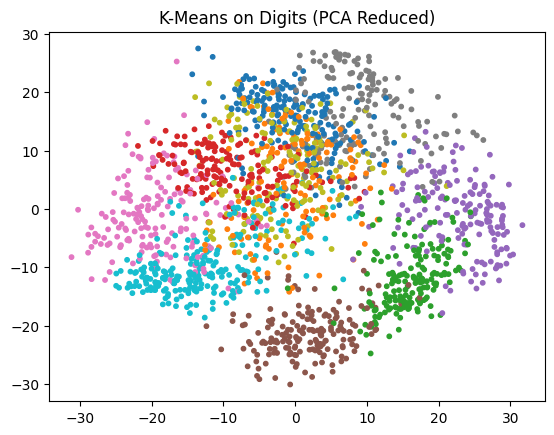

In [9]:
#28. Digits dataset + PCA + K-Means
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
X_pca = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=10)
plt.title("K-Means on Digits (PCA Reduced)")
plt.show()


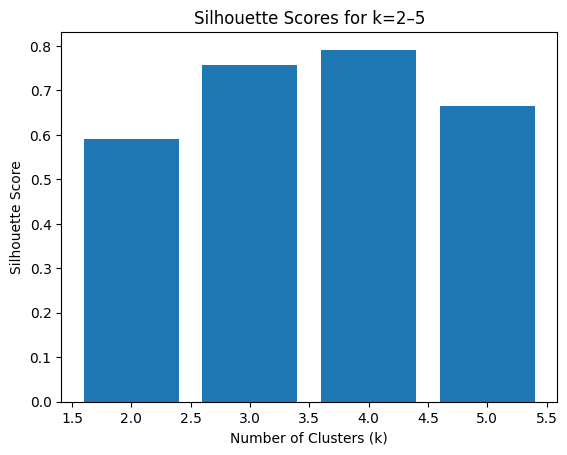

In [10]:
#29. make_blobs + Silhouette Score (k=2–5)
from sklearn.metrics import silhouette_score
import numpy as np

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(range(2, 6), scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k=2–5")
plt.show()


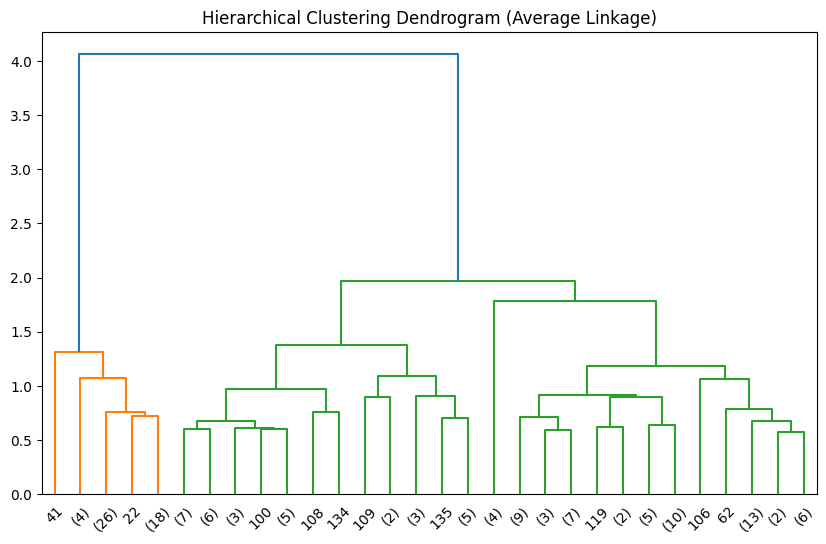

In [11]:
#30. Iris dataset + Hierarchical Clustering + Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
linked = linkage(X, method="average")

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="lastp", p=30, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.show()


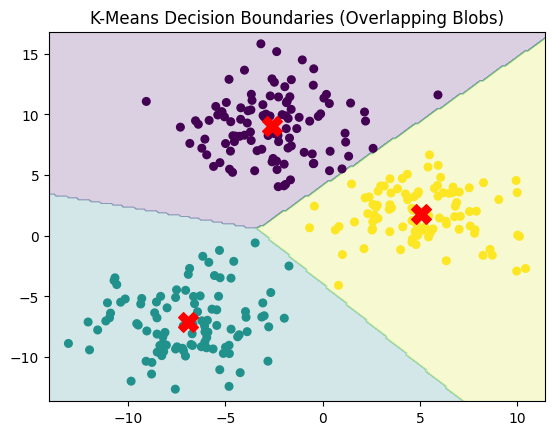

In [12]:
#31. make_blobs (overlapping clusters) + K-Means decision boundaries
import numpy as np

X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.predict(X)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200)
plt.title("K-Means Decision Boundaries (Overlapping Blobs)")
plt.show()


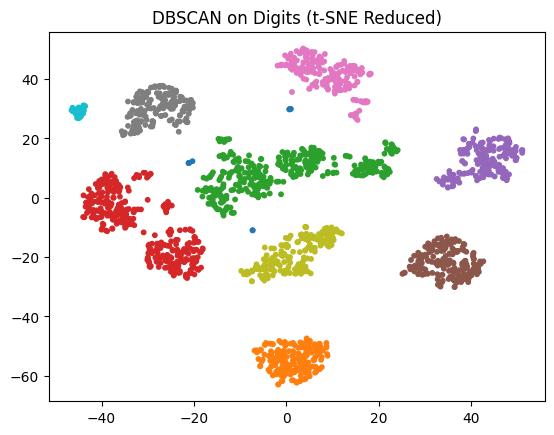

In [13]:
#32. Digits dataset + t-SNE + DBSCAN
from sklearn.manifold import TSNE

digits = load_digits()
X = digits.data
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

db = DBSCAN(eps=5, min_samples=10).fit(X_tsne)
labels = db.labels_

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="tab10", s=10)
plt.title("DBSCAN on Digits (t-SNE Reduced)")
plt.show()


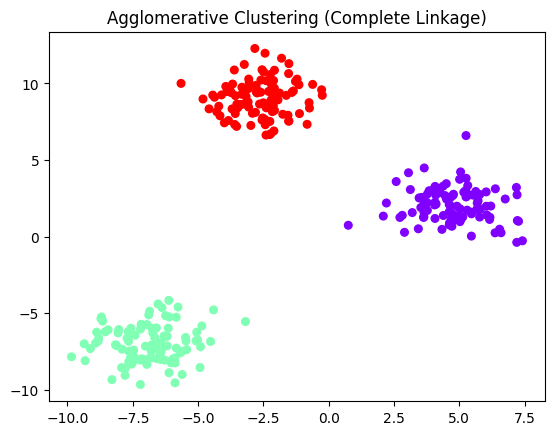

In [14]:
#33. make_blobs + Agglomerative Clustering (complete linkage)
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.2)
agg = AgglomerativeClustering(n_clusters=3, linkage="complete")
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow", s=30)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


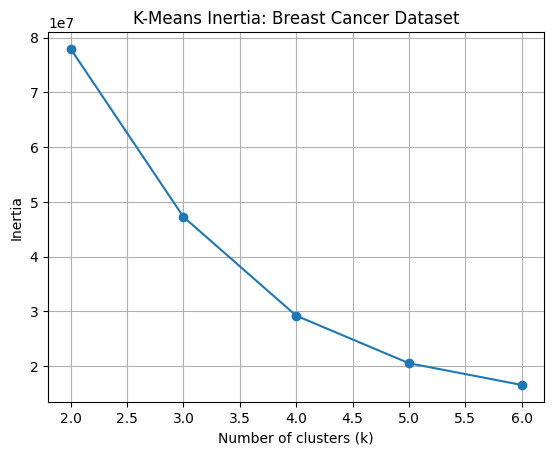

In [15]:
#34. Breast Cancer: K-Means inertia for K = 2–6
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
X, y = load_breast_cancer(return_X_y=True)
inertias = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.title("K-Means Inertia: Breast Cancer Dataset")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


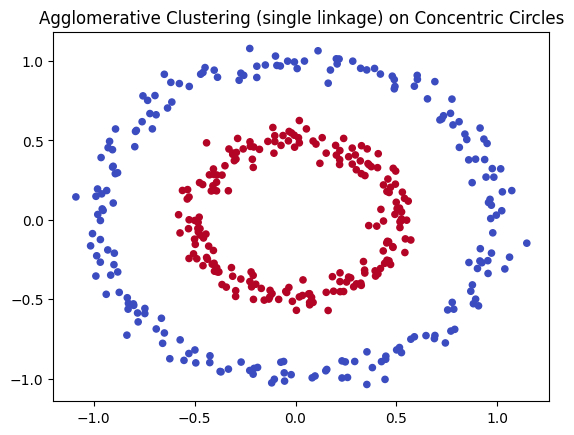

In [16]:
#35. Concentric circles + Agglomerative Clustering (single linkage)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='coolwarm', s=20)
plt.title("Agglomerative Clustering (single linkage) on Concentric Circles")
plt.show()


In [17]:
#36. Wine dataset + DBSCAN → count clusters (excluding noise)
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X, y = load_wine(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.9, min_samples=5)
labels = db.fit_predict(X_scaled)

n_clusters = len([lab for lab in set(labels) if lab != -1])
n_noise = np.sum(labels == -1)

print("Number of clusters (excluding noise):", n_clusters)
print("Number of noise points:", int(n_noise))


Number of clusters (excluding noise): 0
Number of noise points: 178


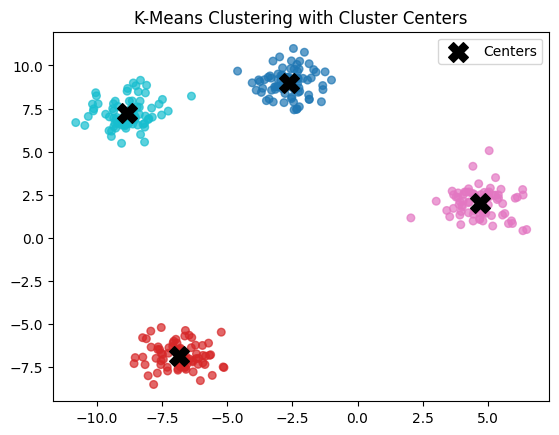

In [18]:
#37. make_blobs + KMeans + plot cluster centers
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30, alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], c='black', marker='X', s=200, label='Centers')
plt.title("K-Means Clustering with Cluster Centers")
plt.legend()
plt.show()


In [19]:
#38. Iris dataset + DBSCAN → number of noise samples
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = load_iris(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X_scaled)

n_noise = np.sum(labels == -1)
print("Number of noise samples:", n_noise)


Number of noise samples: 26


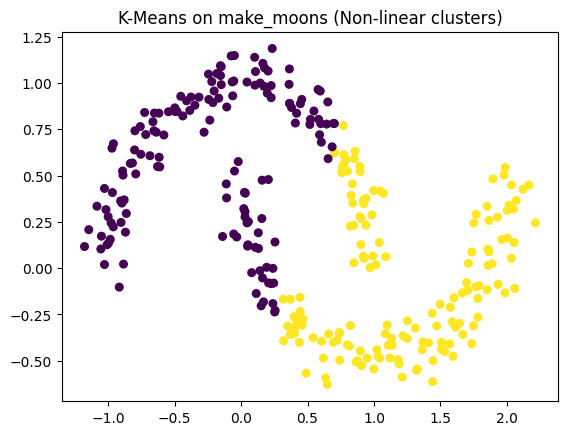

In [20]:
#39. make_moons + K-Means (non-linear clusters)
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, _ = make_moons(n_samples=300, noise=0.08, random_state=42)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.title("K-Means on make_moons (Non-linear clusters)")
plt.show()


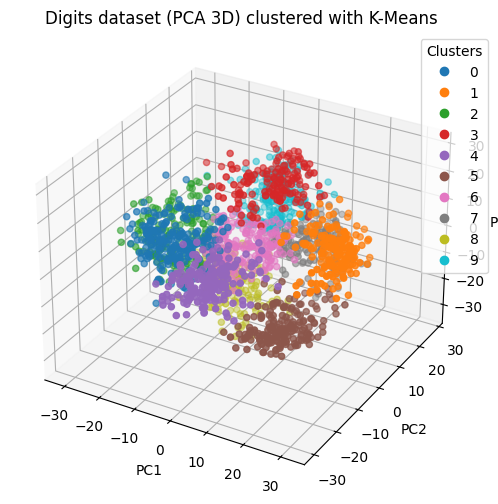

In [21]:
#40. Digits dataset + PCA 3D + KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X = digits.data

pca = PCA(n_components=3, random_state=42)
X3 = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
labels = kmeans.fit_predict(X3)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=labels, cmap='tab10', s=20)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Digits dataset (PCA 3D) clustered with K-Means")
plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1.05,1))
plt.show()


In [22]:
#41. Synthetic blobs (5 centers) + KMeans + silhouette score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.6786441315351273


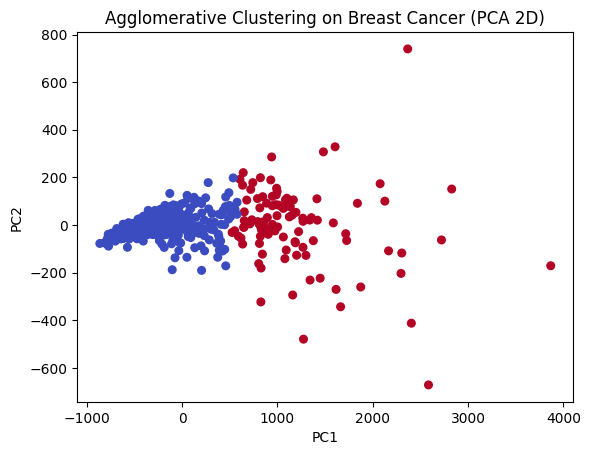

In [23]:
#42. Breast Cancer + PCA + Agglomerative Clustering (2D visualization)
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
X, y = load_breast_cancer(return_X_y=True)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='coolwarm', s=30)
plt.title("Agglomerative Clustering on Breast Cancer (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


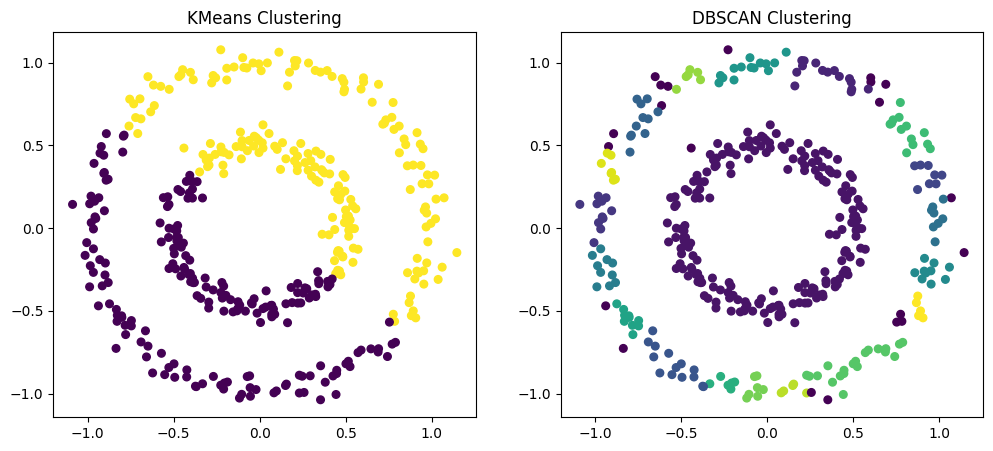

In [24]:
#43. Noisy circles + KMeans vs DBSCAN (side-by-side)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X)
dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)

fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='viridis', s=30)
axs[0].set_title("KMeans Clustering")
axs[1].scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='viridis', s=30)
axs[1].set_title("DBSCAN Clustering")
plt.show()


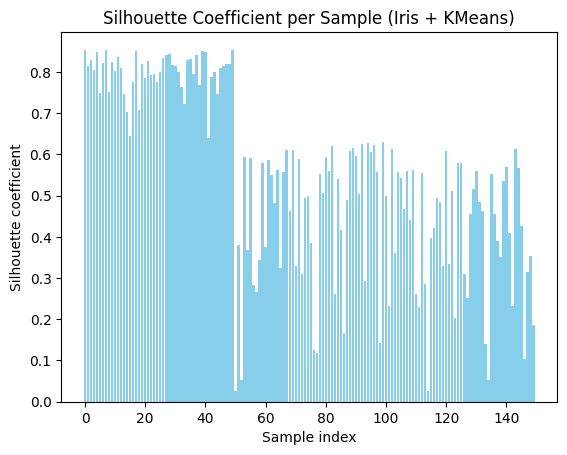

In [25]:
#44. Iris + KMeans + silhouette coefficients per sample
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np

X, y = load_iris(return_X_y=True)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, labels)

plt.bar(range(len(X)), silhouette_vals, color='skyblue')
plt.title("Silhouette Coefficient per Sample (Iris + KMeans)")
plt.xlabel("Sample index")
plt.ylabel("Silhouette coefficient")
plt.show()


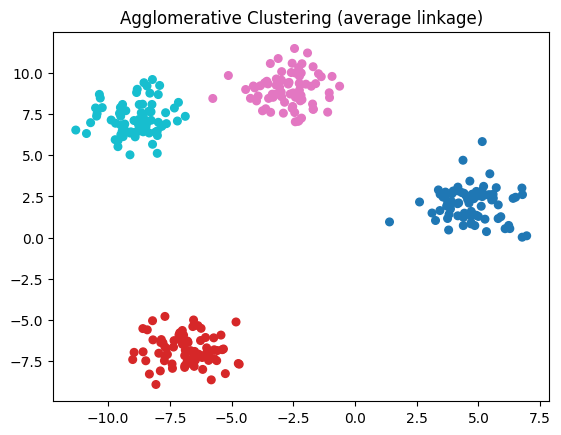

In [26]:
#45. Synthetic blobs + Agglomerative Clustering ('average' linkage)
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30)
plt.title("Agglomerative Clustering (average linkage)")
plt.show()


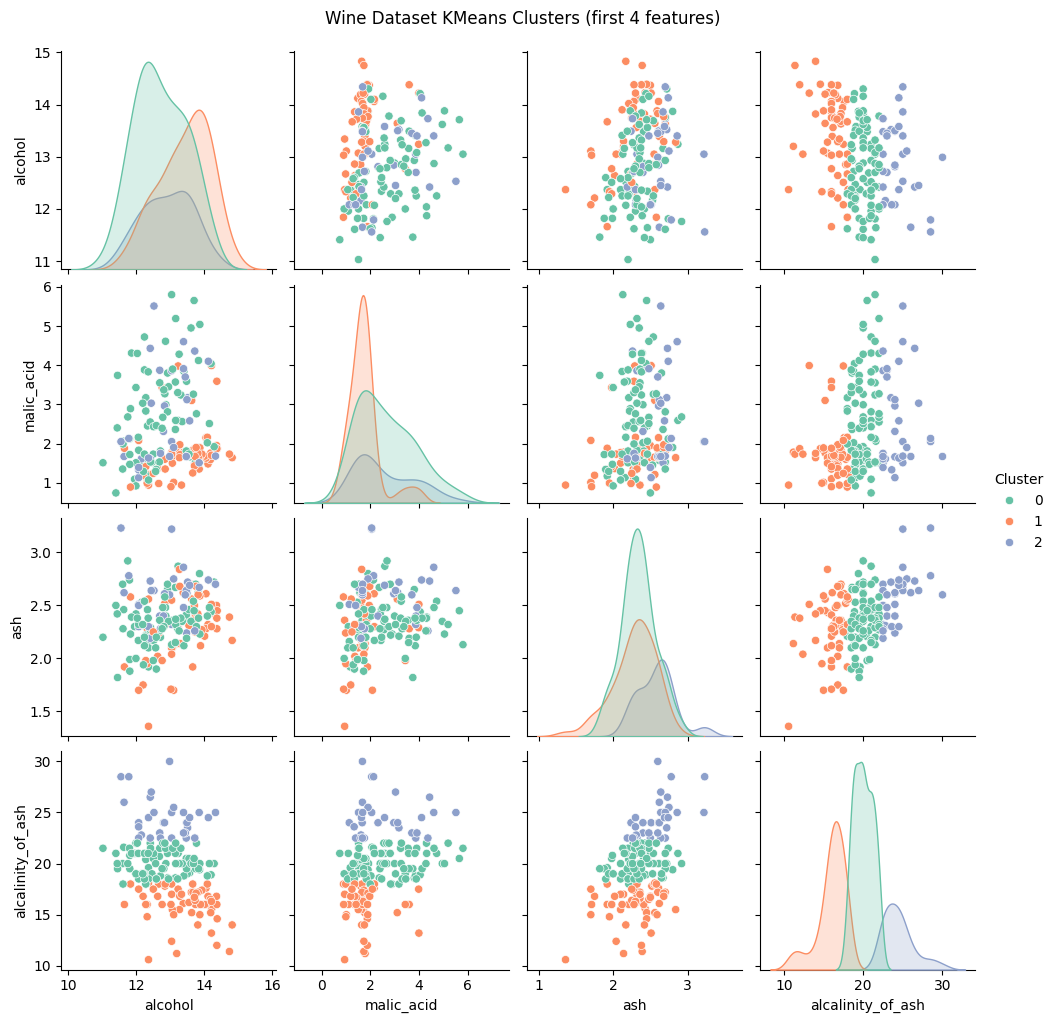

In [27]:
#46) Wine dataset + KMeans + seaborn pairplot (first 4 features)
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

X, _ = load_wine(return_X_y=True)
columns = load_wine().feature_names[:4]
df = pd.DataFrame(X[:, :4], columns=columns)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X[:, :4])

sns.pairplot(df, hue='Cluster', palette='Set2')
plt.suptitle("Wine Dataset KMeans Clusters (first 4 features)", y=1.02)
plt.show()


In [28]:
#47. Noisy blobs + DBSCAN → clusters + noise points count
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.2, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X_scaled)
n_clusters = len([l for l in set(labels) if l != -1])
n_noise = np.sum(labels == -1)
print("Clusters (excluding noise):", n_clusters)
print("Noise points:", int(n_noise))


Clusters (excluding noise): 3
Noise points: 0


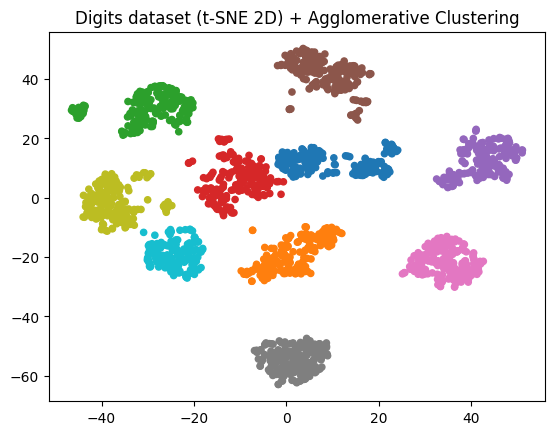

In [30]:
#48. Digits dataset + t-SNE + Agglomerative Clustering + plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

digits = load_digits()
X = digits.data

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_embedded)

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap='tab10', s=20)
plt.title("Digits dataset (t-SNE 2D) + Agglomerative Clustering")
plt.show()
